# Second Mind Initiative: Project Summary

The goal of this project was to suggest doctors for somebody diagnosed with cancer and seeking a second opinion. Motivating factors are:
-  Most doctors are recommended by PCPs, who suggests a second doctor?
-  There is a high cost to incorrect diagnoses.

Upon exploration of the problem, two important assumptions were made:
-  When seeking a second opinion, you likely want a doctor with an academic background.  
-  A patient has no easy way of knowing what the actual specialty of any doctor is. Most websites use words such as “hematologist” and “internist”. In an ideal world, a patient could enter their exact diagnosis and be suggested a local expert. The assumption was made that a doctor specializing in a subcategory of cancer (breast, colon, kidney etc.) would provide an expert second opinion. 

Illustrated below is a test of the first assumption. The best doctors have significantly higher numbers of publications.

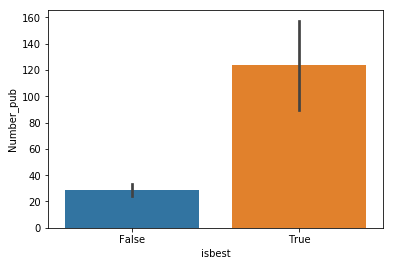

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

df = pd.read_pickle('NYdatafinal.pkl')
sns.barplot(x = df.isbest, y = df.Number_pub)

In [15]:
#plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data, pre-processing, and generating features

Data acquisition is largely done in the file importdata.py. The code is cleaned and written for NYC data. A dataset is curated with the following information:
-  All doctors: Healthgrades.com: all medical oncologists in NYC and Boston. *Note: Doctor institutions/hospitals are one-hot-encoded, however only healthgrades internal institution ID is used. A quick google search reveals which healghtrades ID is linked to which institution. Future versions would incorporate this information.*
-  Best doctors: NYMag + Boston Mag. *See: CleanData.ipynb*
-  All publication data: Pubmed (need to provide email address). *Note: The current publication search is done as follows: Doctor Name + Neoplasms (or cancer) [MESH TERMS]. This is likely prone to errors for doctors with common names. Future improvements would involve including institution of doctor.*
-  Citations for each publication: (Need to register and get a personal API key)

Initial data exploration is in InitialDataExploration.ipynb. Since no model was giving even moderate perfmormance, feature engineering was done as illustrated in Feature Engineering.ipynb. Key features were extracted from publication data: Recent publications, mentions of the word "trial". In addition all abstract and article words were saved. *Note; I envision future improvements 

## Model Selection and Performance

The model is illustrated in datafitting.ipynb. I think there is a lot of room for more thorough process here. I believe the 7-fold cross-validation could be improved. I selected a model to maximize recall while retaining reasonable accuracy (>80%) by looking at confusion matrices, but plots of recall & accuracy wrt logistic regression thresholds may have been more helpful. 

Despite all my rookie mistakes, the model performed well in Boston. *Model has high false negatives for doctors at institutions in Boston that are not in NYC (eg. Dana Farber). This is to be expected since features in the model are informed by NYC data. Future iterations could use some national/cancer based ranking systems of hospitals.*

Shown below are confusion matrices for Boston and NY datasets, taken from DataFitting.ipynb.

Confusion matrix, without normalization
[[318  50]
 [  1  19]]


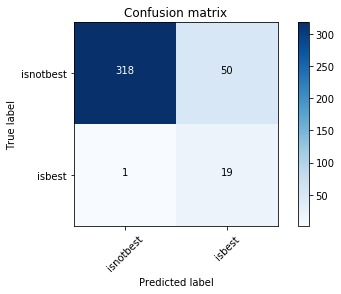

In [19]:
#NY confusion matrix
cm_bos = np.array([[359,  15],
       [ 28,  15]])
cm_nyc = np.array([[318,  50],
       [  1,  19]])
classes = ['isnotbest','isbest']
plot_confusion_matrix(cm_nyc,classes)

Confusion matrix, without normalization
[[359  15]
 [ 28  15]]


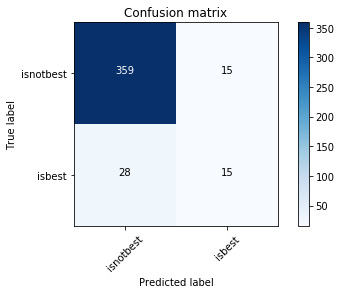

In [20]:
plot_confusion_matrix(cm_bos,classes)

## Finding Doctor Subspecialties

This is highlighted in the notebook titled NLP topic modeling. Non-negative matrix factorization performas better than Latent Dirchelet Allocation, probably because it is able to account for TFIDF ranking of words. 

